<a href="https://colab.research.google.com/github/shi-star/Regression_extended_Lasso_Ridge_ElasticNet/blob/main/Ridge_Reg_Car_insur_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Business Problem

<li>The bank has potential customers’ data, and bank’s employees call them for
advertising available car insurance options.</li><br>
<li>We are provided with general information about clients (age, job, etc.) as well
as more specific information about the current insurance sell campaign
(communication, last contact day) and previous campaigns (attributes like
previous attempts, outcome).</li><br>
<li?You have data about 4000 customers who were contacted during the last
campaign and for whom the results of campaign (did the customer buy
insurance or not) are known.</li><br>

## Task and Approach:
The task is to predict for 1000 customers who were contacted during the
current campaign, whether they will buy car insurance or not.
We will be using logistic Regression with Lasso penalty to predict it.

In [2]:
path1 = '/content/drive/MyDrive/carInsurance_test (1).csv'

In [3]:
path= '/content/drive/MyDrive/carInsurance_train (1).csv'

In [4]:
import pandas as pd

In [5]:
df_tr = pd.read_csv(path)

In [6]:
df_tst = pd.read_csv(path1)

# First we will work on the Train data only. 

Let's import the important libraries. 

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Let's check the few rows and columns of the data 

In [8]:
df_tr.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


# Feature Overview
Feature Description Example<br>
1.**Id Unique**: ID number. Predictions file
should contain this feature.
“1” … “5000”<br>
**2.Age**: Age of the client<br>
**3.Job:** Job of the client. "admin.", "blue-collar", etc.<br>
**4.Marital:** Marital status of the client "divorced", "married", "single"<br>
**5.Education:** Education level of the client "primary", "secondary", etc.<br>
**6.Default:** Has credit in default? "yes" - 1,"no" - 0.<br>
**7.Balance:** Average yearly balance, in USD.<br>
**8.HHInsurance:** Is household insured "yes" - 1,"no" - 0.<br>
**9.CarLoan:** Has the client a car loan "yes" - 1,"no" - 0.<br>
**10.Communication:** Contact communication type "cellular", "telephone", “NA”.<br>
**11.LastContactMonth:** Month of the last contact "jan", "feb", etc.<br>
**12.LastContactDay:** Day of the last contact<br>
**13.CallStart:** Start time of the last call
(HH:MM:SS)
12:43:15<br>
**14.CallEnd:** End time of the last call<br>
(HH:MM:SS)
12:43:15
**15.NoOfContacts:** Number of contacts performed
during this campaign for this
client<br>
**16.DaysPassed:** Number of days that passed by
after the client was last contacted
from a previous campaign
(numeric; -1 means client was not
previously contacted)<br>
**17.PrevAttempts :** Number of contacts performed
before this campaign and for this
client<br>
**18.Outcome :**Outcome of the previous
marketing campaign
"failure", "other", "success", “NA”<br>
**19:CarInsurance:** Has the client subscribed a
CarInsurance?
"yes" - 1,"no" - 0

## My initial inferences from the columns.<br>
1. I can see job_id is not important as it does not provide any info. about insurance decision. so we will remove it firstly.<br>
2. we need to think about communication type, as it does not seem important in making decision  if the cx will purchase it or not.<br>
3. Last contact month and day provide almost same type of info. so it would be better if we keep any one of them. <br>
4. Call start and end time , does not give any infor. so we will see if it should have been kept or not. 


**However these are just initial inferences, we can not take any decision at this point. Will further analyse the data thoroughly and then will take decisions further.**



Let's check the shape of the data.


In [9]:
df_tr.shape

(4000, 19)

So we have 4000 rows and 19 columns.<br>
Now let's check the info of the data.

In [10]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Job               3981 non-null   object
 3   Marital           4000 non-null   object
 4   Education         3831 non-null   object
 5   Default           4000 non-null   int64 
 6   Balance           4000 non-null   int64 
 7   HHInsurance       4000 non-null   int64 
 8   CarLoan           4000 non-null   int64 
 9   Communication     3098 non-null   object
 10  LastContactDay    4000 non-null   int64 
 11  LastContactMonth  4000 non-null   object
 12  NoOfContacts      4000 non-null   int64 
 13  DaysPassed        4000 non-null   int64 
 14  PrevAttempts      4000 non-null   int64 
 15  Outcome           958 non-null    object
 16  CallStart         4000 non-null   object
 17  CallEnd       

Here we can see some columns which have missing values in them. <br>
We can see we have 11 numerical columns and 8 categorical columns.<br>
Let's check the exact number of missing values. 

In [11]:
df_tr.isnull().sum()

Id                     0
Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

We can see 4 columns have missing values in them. Let's check the % of the missing values.

In [12]:
df_tr.isnull().sum()/len(df_tr)

Id                  0.00000
Age                 0.00000
Job                 0.00475
Marital             0.00000
Education           0.04225
Default             0.00000
Balance             0.00000
HHInsurance         0.00000
CarLoan             0.00000
Communication       0.22550
LastContactDay      0.00000
LastContactMonth    0.00000
NoOfContacts        0.00000
DaysPassed          0.00000
PrevAttempts        0.00000
Outcome             0.76050
CallStart           0.00000
CallEnd             0.00000
CarInsurance        0.00000
dtype: float64

<li>Here we can see Job has 0.04% missing values. <br>
<li>Education has 4% missing values.<br>
<li>Communication has 22.50% missing values.<br>
<li>Outcome has 76% missing values. Which are a lot. so we need to think about the imputation of this column <br>

 ## Let's get some summary of the data. 


In [13]:
df_tr.describe()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,1154.844867,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,1.000000,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,1000.750000,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,2000.500000,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,3000.250000,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,4000.000000,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


## My observations from the summary:
1. I can see the min age for the survey is 18yrs and max is 95yrs. Which means only the adults are surveyed. <br>
2. I can see Default, HHinsurance, Carloan are although numerical columns but they have min 0 and max 1 which suggests they are actually categorical however already in dummy format.
3. I can see the min value in balance is in -ve. and max is huge. it shows the huge variation in the column.




In [14]:
df_tr.describe(include='object')

,Job,Marital,Education,Communication,LastContactMonth,Outcome,CallStart,CallEnd
count,3981,4000,3831,3098,4000,958,4000,4000
unique,11,3,3,2,12,3,3777,3764
top,management,married,secondary,cellular,may,failure,17:11:04,11:27:46
freq,893,2304,1988,2831,1049,437,3,3


Here I can see unique values in each categorical column. I can see the mode of each column. <br>
I can see CallStart and CallEnd are of object type however they are in form of time, and huge unique values. <br> 
So in this case, Let's create one column as 'Call_Duration' with the help of both CallEnd and CallStart.

In [15]:
df_tr.select_dtypes(include='object').columns

Index(['Job', 'Marital', 'Education', 'Communication', 'LastContactMonth',
       'Outcome', 'CallStart', 'CallEnd'],
      dtype='object')

In [16]:
df_tr['CallStart'].nunique()

3777

In [17]:
df_tr['CallEnd'].nunique()

3764

In [18]:
df_tr[['CallStart','CallEnd']]=df_tr[['CallStart','CallEnd']].astype('datetime64[ns]')

In [19]:
df_tr['Call_Duration']=df_tr['CallEnd']-df_tr['CallStart']

In [20]:
df_tr['Call_Duration']=df_tr['Call_Duration'].dt.components['minutes']*60 + df_tr['Call_Duration'].dt.components['seconds']
df_tr['Call_Duration'].head()

0     70
1    185
2    340
3    819
4    192
Name: Call_Duration, dtype: int64

In [21]:
df_tr['Call_Duration']=df_tr['Call_Duration'].apply(lambda x: round(x/60),2)
df_tr['Call_Duration'].tail()

3995    4
3996    2
3997    5
3998    2
3999    5
Name: Call_Duration, dtype: int64

# Let's do the Univariate Analysis of Categorical Variables and Numerical Variables.
## Let's start with categorical variables first.



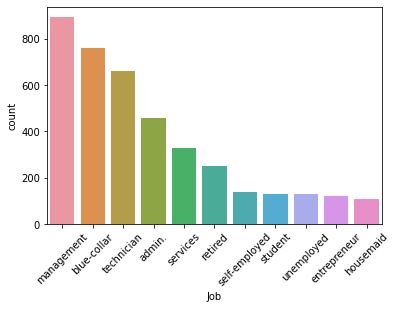

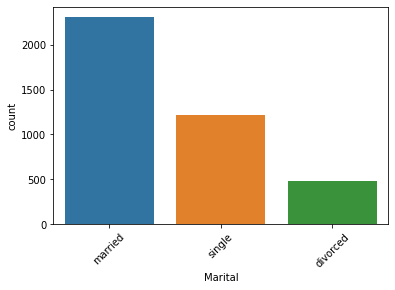

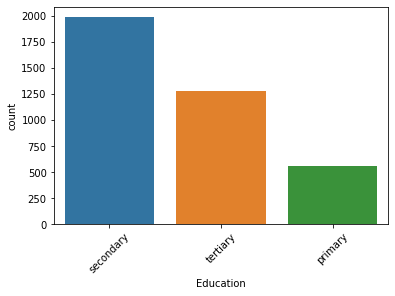

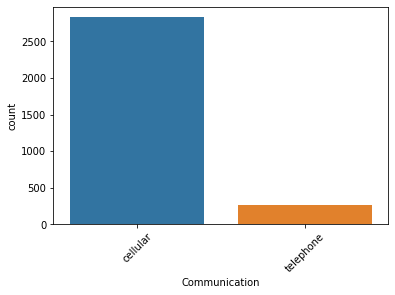

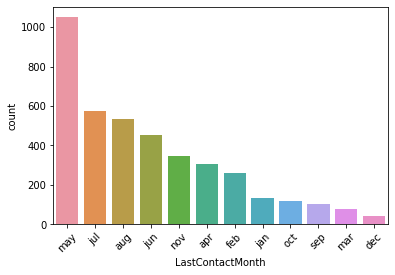

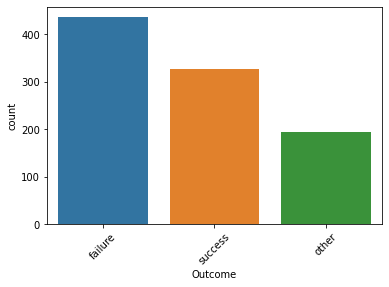

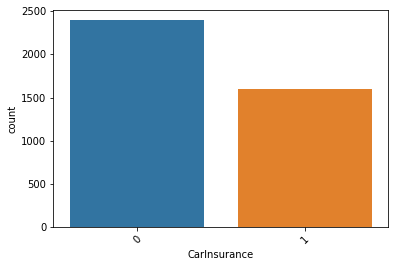

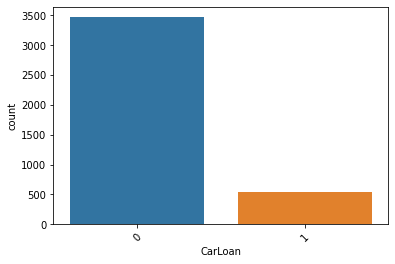

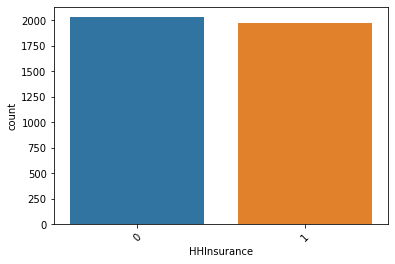

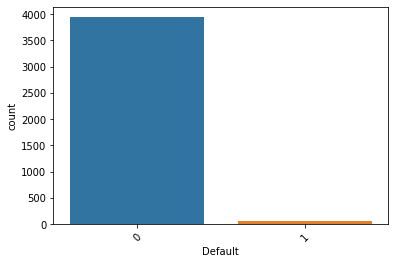

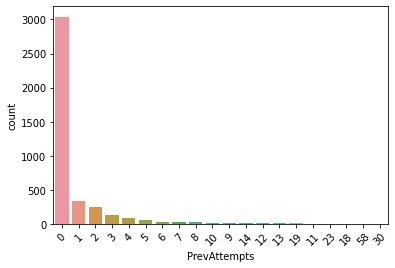

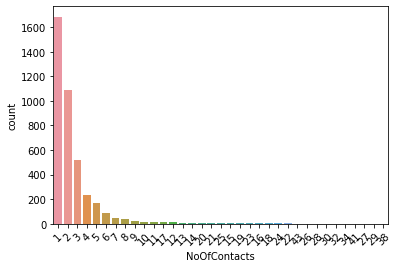

In [22]:
list_obj= ['Job', 'Marital', 'Education', 'Communication', 'LastContactMonth',
       'Outcome', 'CarInsurance', 'CarLoan','HHInsurance','Default','PrevAttempts','NoOfContacts' ]

for i in list_obj:
  sns.countplot(x=df_tr[i], data=df_tr , order=df_tr[i].value_counts().index)
  plt.xticks(rotation=45)
  plt.show()

1.**Job** : Here we can see the maximum people surveyed are in management, and after that in 'blue collar" and goes on. <br>
2.**Marital** : Here we can see the max people are married in surveyed.<br>
3.**Education** : People mostly have 'secondary' education. the least are 'primary'.<br>
4.**Communication** : We can see mostly people have 'cellular'.<br>
5.**LastContactMonth** : Mostly people have been surveyed in 'May' and the least in 'Oct', 'sep','mar','dec'.<br>
6.**Outcome**: we can see mostly attempts have 'failure' outcome.<br>
7.**Carloan** : Mostly people do not have carloan.<br>
8.**Default** : we can see mostly people do not default.<br>
9.**PrevAttempts** : Mostly people have not been attempted even once. While few people have been contacted even 58 times.<br>
10.**Noofcontacts**:Many people have 1 or 2 cotacts.<br>

## Let's do the univariate analysis of continous variables.

In [23]:
list_num=['Age','Balance','LastContactDay','DaysPassed', 'Call_Duration']

In [24]:
import warnings
warnings.filterwarnings("ignore")

Age


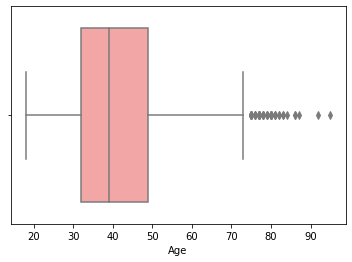

Balance


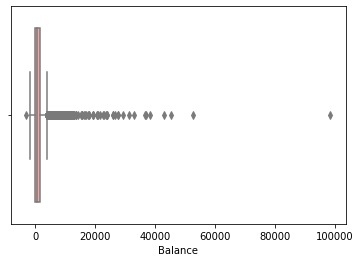

LastContactDay


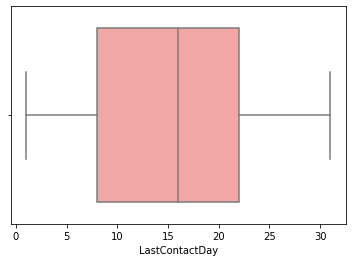

DaysPassed


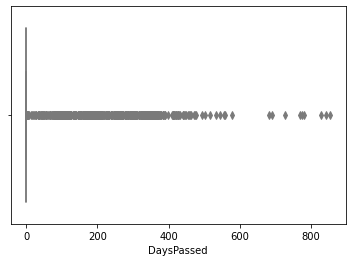

Call_Duration


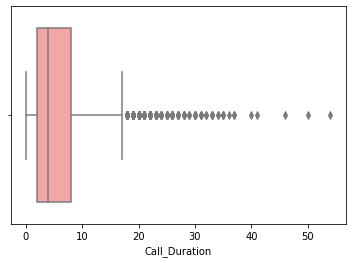

In [25]:
for i in list_num:
  print(i)
  sns.boxplot(x=df_tr[i], color='#ff9999' ,data=df_tr)
  plt.show()

1.**Age**: we can see almost 50% are in 30-50 age groups.<br>
2.**Balance**: We can see balance has lot variation.<br>
3.**LastcontactDay**: We can see mostly people have been contacted within 7 to 22 days.<br>
4.**Call_Duration**: We can see the mostly calls are in 1 min to 8 or 9 min. However many calls are more than 15 min and goes to upto 60 min.<br>

With the help of the boxplot I can see outlier in the column. However as they are huge in number so we can not remove all of them as they are significant for the model.However I will remove few outliers. From 'Balance' and 'Age'. <br>
### Let's treat the outliers now


In [26]:
print(df_tr['Balance'].max())
print(df_tr['Balance'].min())
print(df_tr['Balance'].mean())
print(df_tr['Balance'].median())

98417
-3058
1532.93725
551.5


In [27]:
df_tr.loc[df_tr['Balance']==df_tr['Balance'].max()]
df_tr['Balance']=df_tr['Balance'].replace(df_tr['Balance'].max(), df_tr['Balance'].median())

In [28]:
df_tr['Balance']=df_tr['Balance'].replace(df_tr['Balance'].min(), df_tr['Balance'].median())

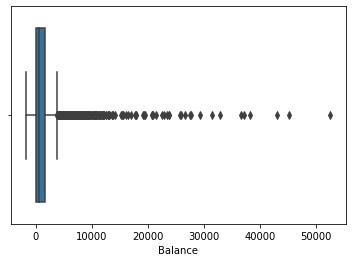

In [29]:
sns.boxplot(x=df_tr['Balance'], data=df_tr)

In [30]:
df_tr['Age'].nlargest(2)

3837    95
2570    92
Name: Age, dtype: int64

In [31]:
print(df_tr['Age'].mean())

print(df_tr['Age'].median())

41.21475
39.0


In [32]:
df_tr['Age']= df_tr['Age'].replace(df_tr['Age'].max(), df_tr['Age'].median())


In [33]:
df_tr['Age'].nlargest(2)

2570    92
1409    87
Name: Age, dtype: int64

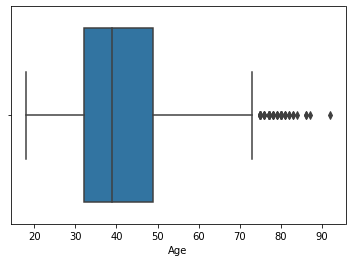

In [34]:
sns.boxplot(x=df_tr['Age'], data=df_tr)

We have replaced the outlier value with Median  for both the max and min. I did so  because the max value is the very far from the 2nd largest. However the 2nd largest is near the rest of the values. And I removed the min as the min value is far from the 2nd smallest value. Which we can also see in the boxplot. <br>
We replaced the two max values with median.And now we do not have extreme outliers. As rest of the outliers are significant for the model

# Bivariate Analysis

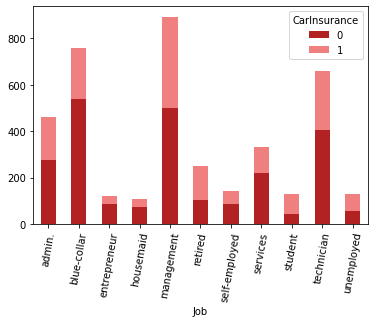

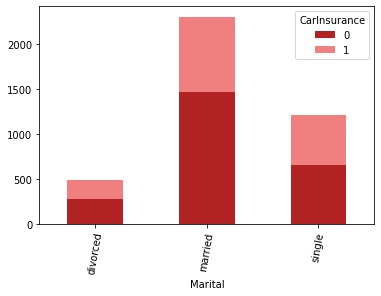

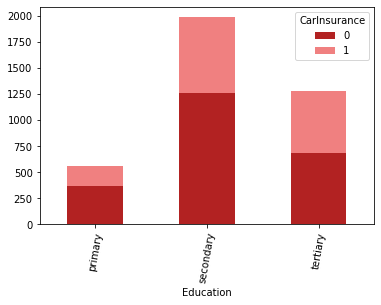

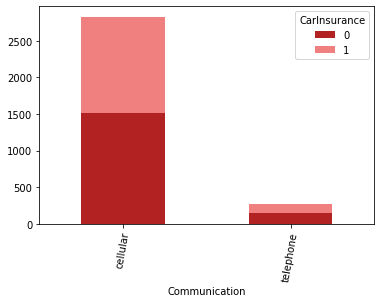

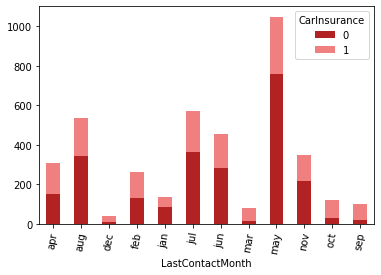

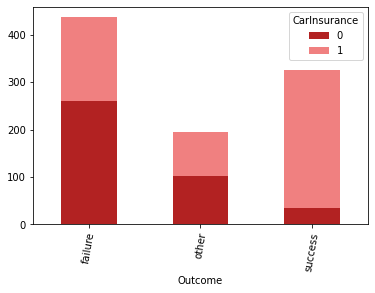

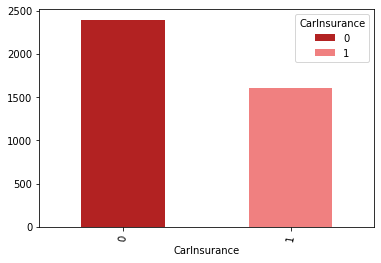

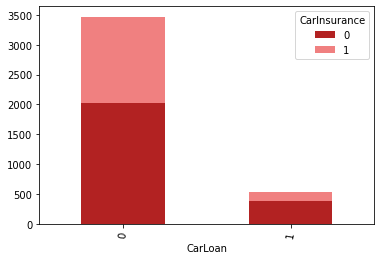

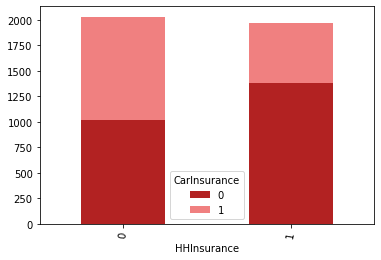

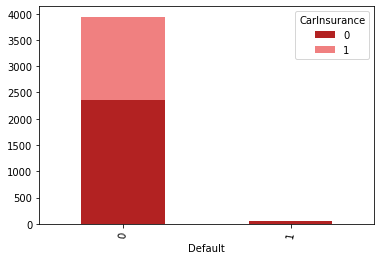

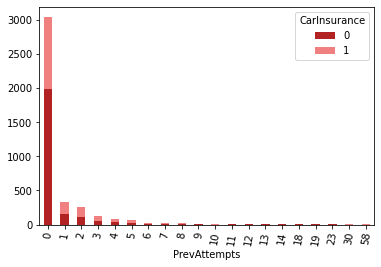

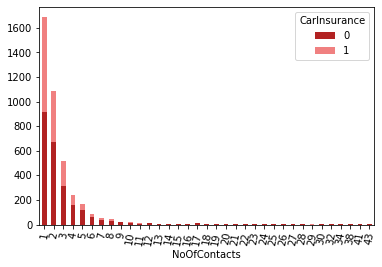

In [35]:
for i in list_obj:
  pd.crosstab(df_tr[i], df_tr['CarInsurance']).plot(kind='bar', stacked=True, grid=False,rot=0, color =['firebrick','lightcoral'])
  #plt.text(df_tr[i], df_tr['CarInsurance'], " "+str(df_tr[i]), color='blue', va='center', fontweight='bold')
  plt.xticks(rotation=80)
  plt.show()

1.We can see the among the people who have been contact in each job, the **retired** and **students** people are most likely to take insurance.<br>
2.**Marital status do not effect the decision**  of taking insurance, as the number of total surveyed in each category, there's equal no of yes and no for car Insurance.<br>
3.**Cellular and telephone do not effect the decision**, as equal no and yes in both. <br>
4.We can although mostly people have been contacted in May, but onl few people took the insurance, while from the total **people contacted in 'Sep', 'Oct','mar','Dec' mostly people took the insurance**.<br>
5.We can see the people **who took the insurance before, are more likely to take the** insurance again.<br>
6.We can see the people **who have HHinsurance, are more likely** to take the carInsurance as well. <br>
7.We can see the people who default  previously do not take car insurance.<br>
8.We can see more previous attemps, more likely is the customer to take the insurance.<br>





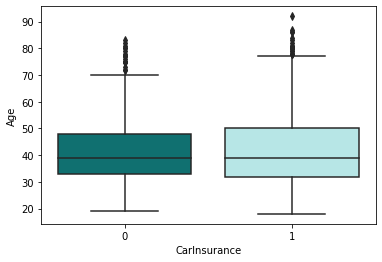

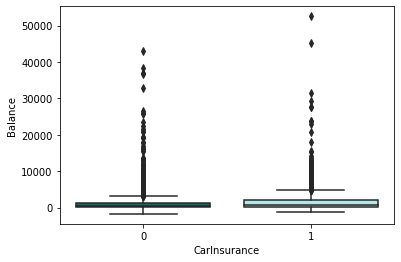

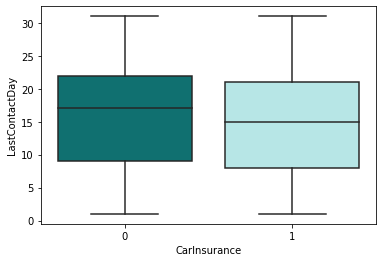

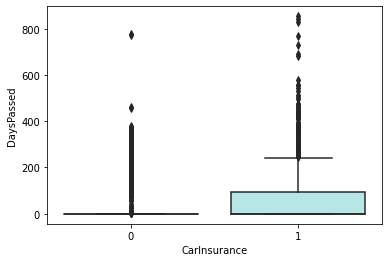

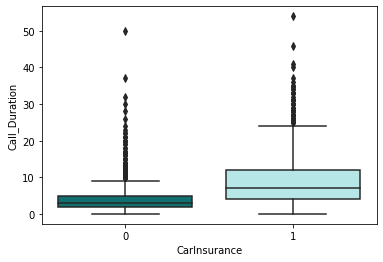

In [36]:
for i in list_num:
  sns.boxplot(x='CarInsurance',y=df_tr[i], data=df_tr, palette=['teal', 'paleturquoise'])
  plt.show()

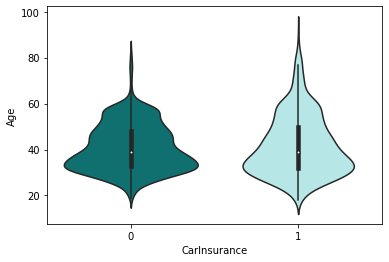

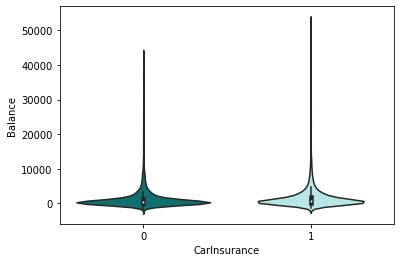

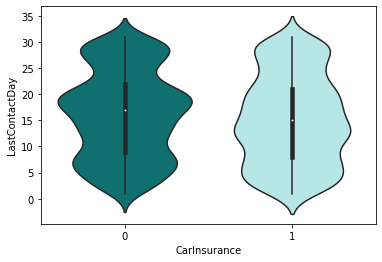

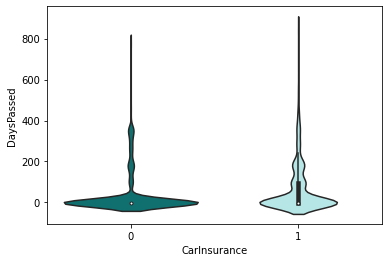

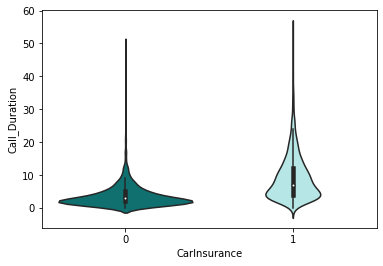

In [37]:
for i in list_num:
  sns.violinplot(x='CarInsurance',y=df_tr[i], data=df_tr, palette=['teal', 'paleturquoise'])
  plt.show()

1.We can see from the age of 30 to 50 are more likely to take the carInsurance. However even the higher age group is 
also likely to take insurance.<br>
2.**Balance does not effect** the carInsurance much, however with more balance the people are likely to take insurance.<br>
3.The **more the call duration , more likely** the customer to take the carInsurance.

# Let's do the Bivariate analysis of numerical columns with the target column.

As I will drop communication column. so will not treat the null values in communication columns.

We can see Education and job are correlated columns. However both the columns have missing values in them. And there are some rows which have both the column missing. So in this case we will impute the education column on the basis of job. However as job has only 19 values missing so we will create a new category for these missing values in Job column

In [38]:
pd.crosstab(df_tr['Education'], df_tr['Job'])

Job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
Education,,,,,,,,,,,
primary,9,281,13,56,22,93,6,27,8,16,26
secondary,374,430,50,33,94,100,43,269,67,446,77
tertiary,62,17,55,16,751,37,84,25,31,177,25


In [39]:
x=df_tr[df_tr['Job'].isnull()]
x

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance,Call_Duration
27,28,45,NaN,divorced,NaN,0,0.0,0,0,cellular,21,apr,3,-1,0,NaN,2021-06-21 12:33:22,2021-06-21 12:38:00,1,5
239,240,41,NaN,single,NaN,0,942.0,0,0,cellular,27,oct,1,188,1,success,2021-06-21 16:39:43,2021-06-21 16:42:06,1,2
486,487,54,NaN,married,primary,0,981.0,0,0,cellular,22,aug,12,-1,0,NaN,2021-06-21 11:31:36,2021-06-21 11:42:27,0,11
536,537,33,NaN,single,secondary,0,1522.0,0,1,cellular,19,nov,1,-1,0,NaN,2021-06-21 12:44:40,2021-06-21 13:00:46,0,16
605,606,53,NaN,married,primary,0,732.0,0,0,cellular,27,oct,2,-1,0,NaN,2021-06-21 09:01:01,2021-06-21 09:13:40,1,13
1130,1131,55,NaN,married,tertiary,0,0.0,0,0,NaN,5,jun,1,-1,0,NaN,2021-06-21 14:36:38,2021-06-21 14:37:16,0,1
1147,1148,50,NaN,married,NaN,0,558.0,0,0,cellular,9,jul,1,683,6,failure,2021-06-21 09:01:52,2021-06-21 09:09:36,1,8
1438,1439,27,NaN,single,secondary,0,1187.0,0,0,telephone,26,feb,1,101,1,failure,2021-06-21 09:13:46,2021-06-21 09:17:38,1,4
1755,1756,28,NaN,single,secondary,0,4465.0,0,0,cellular,28,jan,1,-1,0,NaN,2021-06-21 14:03:50,2021-06-21 14:16:39,1,13
1978,1979,49,NaN,single,tertiary,0,2226.0,0,0,NaN,17,jun,3,-1,0,NaN,2021-06-21 17:14:08,2021-06-21 17:16:26,0,2


In [40]:

df_tr['Job'] = df_tr['Job'].fillna('None')
df_tr['Job'].isnull().sum()

0

In [41]:
df_tr['Job'].value_counts()

management       893
blue-collar      759
technician       660
admin.           459
services         330
retired          249
self-employed    140
student          131
unemployed       130
entrepreneur     121
housemaid        109
None              19
Name: Job, dtype: int64

In [42]:
df_tr['Education'].value_counts(dropna=False)

secondary    1988
tertiary     1282
primary       561
NaN           169
Name: Education, dtype: int64

so here we checked the mode for each type of job. so that we can impute the education column according to their education

In [43]:
pd.crosstab(df_tr['Job'], df_tr['Education'])

Education,primary,secondary,tertiary
Job,,,
None,4,5,2
admin.,9,374,62
blue-collar,281,430,17
entrepreneur,13,50,55
housemaid,56,33,16
management,22,94,751
retired,93,100,37
self-employed,6,43,84
services,27,269,25


In [44]:
job_types=df_tr['Job'].value_counts().index

In [45]:
edu_mode=[]
for job in job_types:
    mode = df_tr[df_tr.Job==job]['Education'].value_counts().nlargest(1).index
    edu_mode = np.append(edu_mode,mode)
edu_map=pd.Series(edu_mode,index=df_tr.Job.value_counts().index)

edu_map

management        tertiary
blue-collar      secondary
technician       secondary
admin.           secondary
services         secondary
retired          secondary
self-employed     tertiary
student          secondary
unemployed       secondary
entrepreneur      tertiary
housemaid          primary
None             secondary
dtype: object

In [46]:
for j in job_types:
    df_tr.loc[(df_tr['Education'].isnull()) & (df_tr['Job']==j),'Education'] = edu_map.loc[edu_map.index==j][0]


Here we have replaced the missing value and imputed them with the mode of each type of job. And imputed with NONE , which have missing value for job also.

In [47]:
df_tr['Education'].fillna('None',inplace=True)

In [48]:
df_tr['Outcome'].value_counts(dropna=False)

NaN        3042
failure     437
success     326
other       195
Name: Outcome, dtype: int64

We imputed the missing values in outcome where dayspassed is -1.

In [49]:
df_tr.loc[df_tr['DaysPassed']==-1,'Outcome']='NoPrev'
df_tr['Outcome'].value_counts(dropna=False)

NoPrev     3042
failure     437
success     326
other       195
Name: Outcome, dtype: int64

In [50]:
df_tr.isnull().sum()

Id                    0
Age                   0
Job                   0
Marital               0
Education             0
Default               0
Balance               0
HHInsurance           0
CarLoan               0
Communication       902
LastContactDay        0
LastContactMonth      0
NoOfContacts          0
DaysPassed            0
PrevAttempts          0
Outcome               0
CallStart             0
CallEnd               0
CarInsurance          0
Call_Duration         0
dtype: int64

Here we can see we have imputed all the missing values except in communication. As we are going to drop this.

In [51]:
df_tr.drop(columns=['Id','Communication','CallStart','CallEnd', 'Default'], axis='columns', inplace=True)

In [52]:
df_tr.head()

,Age,Job,Marital,Education,Balance,HHInsurance,CarLoan,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CarInsurance,Call_Duration
0,32,management,single,tertiary,1218.0,1,0,28,jan,2,-1,0,NoPrev,0,1
1,32,blue-collar,married,primary,1156.0,1,0,26,may,5,-1,0,NoPrev,0,3
2,29,management,single,tertiary,637.0,1,0,3,jun,1,119,1,failure,1,6
3,25,student,single,primary,373.0,1,0,11,may,2,-1,0,NoPrev,1,14
4,30,management,married,tertiary,2694.0,0,0,3,jun,1,-1,0,NoPrev,0,3


Now let's apply the one hot encoding to all the categorical columns.

In [53]:
df_fin_tr= pd.get_dummies(df_tr, drop_first=True)

In [54]:
df_fin_tr.head()

,Age,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance,Call_Duration,Job_admin.,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed,Marital_married,Marital_single,Education_secondary,Education_tertiary,LastContactMonth_aug,LastContactMonth_dec,LastContactMonth_feb,LastContactMonth_jan,LastContactMonth_jul,LastContactMonth_jun,LastContactMonth_mar,LastContactMonth_may,LastContactMonth_nov,LastContactMonth_oct,LastContactMonth_sep,Outcome_failure,Outcome_other,Outcome_success
0,32,1218.0,1,0,28,2,-1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,32,1156.0,1,0,26,5,-1,0,0,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,29,637.0,1,0,3,1,119,1,1,6,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,25,373.0,1,0,11,2,-1,0,1,14,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,30,2694.0,0,0,3,1,-1,0,0,3,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


Now our data is ready to perform the model. <br>
Let's split the data now 

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X = df_fin_tr.drop(columns=df_fin_tr[['CarInsurance']], axis =1 )

In [57]:
X.head()

,Age,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,Call_Duration,Job_admin.,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed,Marital_married,Marital_single,Education_secondary,Education_tertiary,LastContactMonth_aug,LastContactMonth_dec,LastContactMonth_feb,LastContactMonth_jan,LastContactMonth_jul,LastContactMonth_jun,LastContactMonth_mar,LastContactMonth_may,LastContactMonth_nov,LastContactMonth_oct,LastContactMonth_sep,Outcome_failure,Outcome_other,Outcome_success
0,32,1218.0,1,0,28,2,-1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,32,1156.0,1,0,26,5,-1,0,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,29,637.0,1,0,3,1,119,1,6,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,25,373.0,1,0,11,2,-1,0,14,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,30,2694.0,0,0,3,1,-1,0,3,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [58]:
y = df_fin_tr['CarInsurance']

In [59]:
df_fin_tr.shape

(4000, 39)

In [60]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: CarInsurance, dtype: int64

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=0)

In [62]:
print('Train shape - ', X_train.shape)
print('Test shape  - ', X_test.shape)

Train shape -  (2800, 38)
Test shape  -  (1200, 38)


Finally!!! Let's build the model now. 

Define model parameters to tune:

If the Lambda = 0, it is plain logistic regression , no regularisation. <br>
c=1/0 which is very big value. <br>
Lambda = very big number (Heavy Regularisation),weights will die, <br>
 Bigger the C, smallest the lambda, and vice versa.<br>
 Here we are using L2 or Ridge penalty.

In [63]:
model_parameters = { 'penalty':['l2'], #which penalty we want to give the model, L1 or L2, here we are giving L1 penalty means Lasso
                    'C':[1,10,100,1000], #Lambda strength, and it is inverse of the lambda. Value of C is decided by ourselves.
                    'class_weight': ['balanced',None]} #It balances the data, for target variable if not balanced. 
                    

We have set the parameters for the model.
However we want to know the best parameter for our model. so we will find them through GridSearchCV.


In [64]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score, recall_score, precision_score, make_scorer, accuracy_score, roc_curve, confusion_matrix, classification_report

In [65]:
import joblib

Imported the libraries.

In [66]:
model = LogisticRegression(random_state=1, solver='liblinear')

In [67]:
gscv = GridSearchCV(estimator=model,
                    param_grid=model_parameters,
                    cv=5,                          #for 5 set of cross validation 
                    verbose=1,                       #just for printing
                    n_jobs=-1,                       #just for the speed, fastest possible, not related to ML
                    scoring='f1')
gscv.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    2.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=1, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000],
                         'class_weight': ['balanced', None],
                         'penalty': ['l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=1)

In [68]:
print('The best parameter are -', gscv.best_params_)

The best parameter are - {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2'}


In [69]:
print(gscv.best_score_)
print(gscv.best_estimator_)
print(gscv.scorer_)

0.7771176452470098
LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
make_scorer(f1_score, average=binary)


We have the best parameters.
C as 1 , data should be balanced, penalty will be l2.

In [70]:
final_model = LogisticRegression(**gscv.best_params_,random_state=1,solver='liblinear')
final_model.fit(X_train, y_train)

LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
print('Auc on test by final_model:', roc_auc_score(y_true=y_test, y_score=final_model.predict_log_proba(X_test)[:,1]))

Auc on test by final_model: 0.8968761414983362


In [72]:
print('f1 score on test by final_model:', f1_score(y_true=y_test, y_pred=final_model.predict(X_test)))

f1 score on test by final_model: 0.7652859960552268


In [73]:
print('Auc on test by gscv:', roc_auc_score(y_true=y_test, y_score=gscv.predict_log_proba(X_test)[:,1]))

Auc on test by gscv: 0.8968761414983362


In [74]:
list(zip(X_train.columns, final_model.coef_[0]))

[('Age', 0.0030841014078752615),
 ('Balance', 2.3120758787265377e-05),
 ('HHInsurance', -0.8608119757330184),
 ('CarLoan', -0.6651077288284996),
 ('LastContactDay', -0.008525885812794008),
 ('NoOfContacts', -0.08472219765796105),
 ('DaysPassed', 0.0012467830295027269),
 ('PrevAttempts', 0.03728038777372237),
 ('Call_Duration', 0.3710977894391304),
 ('Job_admin.', 0.06469957846249712),
 ('Job_blue-collar', -0.4788201786280961),
 ('Job_entrepreneur', -0.4540451999646561),
 ('Job_housemaid', -0.4123067940269256),
 ('Job_management', -0.2994256951088454),
 ('Job_retired', 0.26984220216751853),
 ('Job_self-employed', -0.8033111389548012),
 ('Job_services', -0.13336301458281885),
 ('Job_student', 1.115666217601368),
 ('Job_technician', 0.012737453538318583),
 ('Job_unemployed', -0.04020198874994068),
 ('Marital_married', -0.19989903263283057),
 ('Marital_single', -0.024857371812388774),
 ('Education_secondary', 0.11805274073354943),
 ('Education_tertiary', 0.5751565647959662),
 ('LastContact

* As we have used Ridge as penalty. And we know lasso makes the coeff. as zero as 
well for the variables it found not important. And Ridge does not make the coeff. as zero but gives the least coeff. value which is almost zero but not exactly zero. <br>
* As in lasso  we can see the coeff. of 'Outcome_failure', 'Marital_single','Job_unemployed' is zero. It means they have been neglected by the model completely.<br>
* Let's see the value of coeff. of same column in Ridge Reg.
* 'Outcome_failure' 0.04 while in lasso it is 0.0
* ''Marital_single', -0.024 while in lasso it is 0.0
* 'Job_unemployed', -0.040 while in lasso it is 0.0

In [75]:
train_pred = final_model.predict(X_train)
test_pred = final_model.predict(X_test)

In [76]:
print('Classification report for train data is : \n',
      classification_report(y_train, train_pred))
print('Classification report for test data is : \n',
      classification_report(y_test, test_pred))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       0.86      0.85      0.86      1685
           1       0.77      0.80      0.79      1115

    accuracy                           0.83      2800
   macro avg       0.82      0.82      0.82      2800
weighted avg       0.83      0.83      0.83      2800

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       711
           1       0.74      0.79      0.77       489

    accuracy                           0.80      1200
   macro avg       0.79      0.80      0.80      1200
weighted avg       0.81      0.80      0.80      1200



We have our classification Report here. 

In [77]:
final_model.variables = X_train.columns

In [78]:

joblib.dump(final_model,'best_model_ridge.joblib')

['best_model_ridge.joblib']

In [79]:
def plot_roc_curve(y_train_actual, train_pred_prob, y_test_actual, test_pred_prob, *args):
    '''
    Generate the train & test roc curve
    '''

    AUC_Train = roc_auc_score(y_train_actual, train_pred_prob)
    AUC_Test = roc_auc_score(y_test_actual, test_pred_prob)

    if len(args) == 0:
        print("Train AUC = ", AUC_Train)
        print("Test AUC = ", AUC_Test)
        fpr, tpr, thresholds = roc_curve(y_train_actual, train_pred_prob)
        fpr_tst, tpr_tst, thresholds = roc_curve(y_test_actual, test_pred_prob)
        roc_plot(fpr, tpr, fpr_tst, tpr_tst)

    else:
        AUC_Valid = roc_auc_score(args[0], args[1])
        print("Train AUC = ", AUC_Train)
        print("Test AUC = ", AUC_Test)
        print("Validation AUC = ", AUC_Valid)
        fpr, tpr, thresholds = roc_curve(y_train_actual, train_pred_prob)
        fpr_tst, tpr_tst, thresholds = roc_curve(y_test_actual, test_pred_prob)
        fpr_val, tpr_val, thresholds = roc_curve(args[0], args[1])
        roc_plot(fpr, tpr, fpr_tst, tpr_tst, fpr_val, tpr_val)

In [80]:
def roc_plot(fpr, tpr, fpr_tst, tpr_tst, *args):
    '''
    Generates roc plot
    '''

    fig = plt.plot(fpr, tpr, label='Train')
    fig = plt.plot(fpr_tst, tpr_tst, label='Test')

    if len(args) == 0:
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.title("ROC curve using ")
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.show()

    else:
        fig = plt.plot(args[0], args[1], label='Validation')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.title("ROC curve using ")
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.show()

Train AUC =  0.909912576013626
Test AUC =  0.8968761414983362


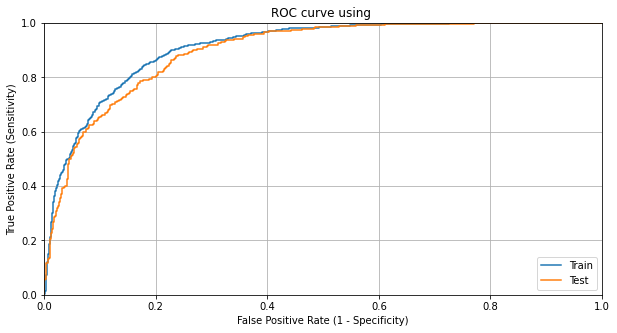

In [81]:
plt.subplots(figsize=(10, 5))
train_prob = final_model.predict_proba(X_train)[:, 1]
test_prob = final_model.predict_proba(X_test)[:, 1]

plot_roc_curve(y_train, train_prob,
               y_test, test_prob)

In [82]:
coefs = pd.DataFrame(list(final_model.coef_.ravel()),
                        list(X_train.columns)).reset_index()
coefs.columns = ['feature', 'coefficient']
coefs = coefs.sort_values(by='coefficient', ascending=False)

In [83]:
coefs

,feature,coefficient
37,Outcome_success,2.416778
17,Job_student,1.115666
30,LastContactMonth_mar,0.973154
34,LastContactMonth_sep,0.920605
33,LastContactMonth_oct,0.870802
25,LastContactMonth_dec,0.821075
23,Education_tertiary,0.575157
8,Call_Duration,0.371098
14,Job_retired,0.269842
36,Outcome_other,0.199627


In [84]:
best_model = joblib.load('best_model_ridge.joblib')

Here we can see the coeff. value and compare it with the coeff. in lasso. However we did not find much difference in roc_score. However it is generally observed that Lasso Regression works better than ridge.